In [1]:
# from google.colab import drive

# drive.mount('/content/drive', force_remount=True)

In [2]:
# !pwd

In [3]:
# https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook#Business-Goal

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set()

from sklearn.cluster import KMeans

In [4]:
# Google Colab 
# df = pd.read_csv('drive/My Drive/Dataset/Gridstore/gridstore_clean.csv')

# Local
df = pd.read_csv('./gridstore_clean.csv')

df.head()

,Unnamed: 0,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000
1,1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000
2,2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600
3,3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
4,4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000


In [5]:
df.describe()

,Unnamed: 0,quantity,sub_total
count,5847.000000,5847.000000,5.847000e+03
mean,2923.000000,1.005986,2.699915e+05
std,1688.027843,0.110042,2.082586e+05
min,0.000000,1.000000,2.400000e+03
25%,1461.500000,1.000000,1.456000e+05
50%,2923.000000,1.000000,2.275000e+05
75%,4384.500000,1.000000,3.640000e+05
max,5846.000000,5.000000,1.768000e+06


In [6]:
df.shape

(5847, 9)

In [7]:
df.duplicated().value_counts()

False    5847
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0          0
trans_date          0
acc_created_date    0
trans_id            0
user_id             0
brand               0
product_name        0
quantity            0
sub_total           0
dtype: int64

In [9]:
df_rfm = df.copy()

df_rfm.drop(columns=['Unnamed: 0'], inplace=True)

df_rfm.head()

,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000
1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000
2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600
3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000


In [10]:
df_rfm.dtypes

trans_date          object
acc_created_date    object
trans_id            object
user_id             object
brand               object
product_name        object
quantity             int64
sub_total            int64
dtype: object

In [11]:
df_rfm['trans_date'] = pd.to_datetime(df_rfm['trans_date'])
df_rfm['acc_created_date'] = pd.to_datetime(df_rfm['acc_created_date'])

df_rfm.dtypes

trans_date          datetime64[ns]
acc_created_date    datetime64[ns]
trans_id                    object
user_id                     object
brand                       object
product_name                object
quantity                     int64
sub_total                    int64
dtype: object

In [12]:
monetary = df_rfm.groupby('user_id')['sub_total'].sum()

monetary.head()

# monetary.sort_values('sub_total', ascending=False).head()

user_id
001b5eddf7    591500
0023cedbf9      7000
0024ae4898    436800
002d8b5849    204750
003e99a26e    145600
Name: sub_total, dtype: int64

In [13]:
frequency = df_rfm.groupby('user_id')['trans_id'].count().reset_index()

frequency.sort_values('trans_id', ascending=False).head()

,user_id,trans_id
2418,9efd34ffe5,21
602,278e551675,15
1868,7a8310aa9f,14
2492,a491801c2d,14
1677,6fce2e62f1,13


In [14]:
max_date = max(df_rfm['trans_date'])

In [15]:
df_rfm['diff_date'] = max_date - df_rfm['trans_date']

df_rfm.head()

,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total,diff_date
0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000,729 days 12:59:36
1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000,729 days 12:59:36
2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600,729 days 12:37:06
3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200,729 days 06:43:49
4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000,729 days 06:22:30


In [16]:
recency = df_rfm.groupby('user_id')['diff_date'].min().reset_index()

recency['diff_date'] = recency['diff_date'].dt.days

recency.head()

,user_id,diff_date
0,001b5eddf7,447
1,0023cedbf9,489
2,0024ae4898,587
3,002d8b5849,137
4,003e99a26e,711


In [17]:
df_rfm = pd.merge(monetary, frequency, on='user_id', how='inner')
df_rfm = pd.merge(df_rfm, recency, on='user_id', how='inner')

df_rfm = df_rfm.rename(columns={'sub_total': 'amount', 'trans_id': 'frequency', 'diff_date': 'recency'})

df_rfm.head()

,user_id,amount,frequency,recency
0,001b5eddf7,591500,2,447
1,0023cedbf9,7000,1,489
2,0024ae4898,436800,2,587
3,002d8b5849,204750,1,137
4,003e99a26e,145600,1,711


In [18]:
df_rfm.shape

(3900, 4)

In [19]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_rfm[['amount', 'frequency', 'recency']])

df_scaled

array([[ 0.43878721,  0.4416056 ,  0.34318529],
       [-0.93476993, -0.4402489 ,  0.54733465],
       [ 0.07524694,  0.4416056 ,  1.02368315],
       ...,
       [ 0.75955804, -0.4402489 , -0.99350693],
       [-0.88542057, -0.4402489 ,  0.70287701],
       [-0.09583084, -0.4402489 ,  0.00779706]])

In [20]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['amount', 'frequency', 'recency']

df_scaled.head()

,amount,frequency,recency
0,0.438787,0.441606,0.343185
1,-0.934770,-0.440249,0.547335
2,0.075247,0.441606,1.023683
3,-0.470063,-0.440249,-1.163631
4,-0.609064,-0.440249,1.626410


In [21]:
df_scaled['user_id'] = df_rfm['user_id']

df_scaled.head()

,amount,frequency,recency,user_id
0,0.438787,0.441606,0.343185,001b5eddf7
1,-0.934770,-0.440249,0.547335,0023cedbf9
2,0.075247,0.441606,1.023683,0024ae4898
3,-0.470063,-0.440249,-1.163631,002d8b5849
4,-0.609064,-0.440249,1.626410,003e99a26e


In [22]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['amount', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.471463,0.531493
1,-1.102225,0.208382
2,-0.000833,1.099646
3,-0.216590,-1.308984
4,-1.245097,1.287732


In [23]:
inertia = []
score = []

for k in range(2, 10):
  km = KMeans(n_clusters=k)
  km.fit(df_pca)

  ss = silhouette_score(df_pca, km.labels_)

  score.append(ss)

  inertia.append(km.inertia_)

print(score)

c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

[0.5391780129340848, 0.4622192507322201, 0.4776392062087557, 0.38867141778755177, 0.39637007261569285, 0.4229710670464362, 0.4207339244652295, 0.41929639192906104]


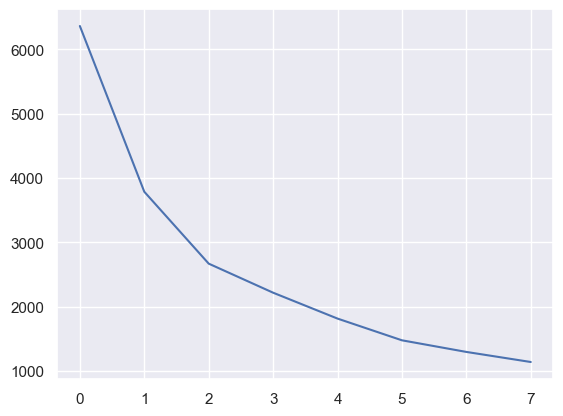

In [24]:
plt.plot(inertia)

In [25]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['amount', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.471463,0.531493
1,-1.102225,0.208382
2,-0.000833,1.099646
3,-0.216590,-1.308984
4,-1.245097,1.287732


<Axes: xlabel='pca1', ylabel='pca2'>

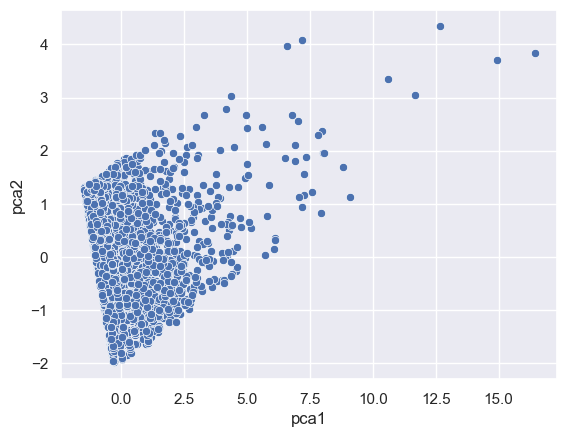

In [26]:
sns.scatterplot(data=df_pca, x='pca1', y='pca2')

In [27]:
km = KMeans(n_clusters=4)
km.fit(df_pca)

c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [28]:
centroid = km.cluster_centers_

centroid

array([[-0.0668074 , -0.95441297],
       [ 7.0667189 ,  1.88129109],
       [-0.67158671,  0.68442515],
       [ 1.9315143 ,  0.06183754]])

In [29]:
df_pca.head()

,pca1,pca2
0,0.471463,0.531493
1,-1.102225,0.208382
2,-0.000833,1.099646
3,-0.216590,-1.308984
4,-1.245097,1.287732


<Axes: xlabel='pca1', ylabel='pca2'>

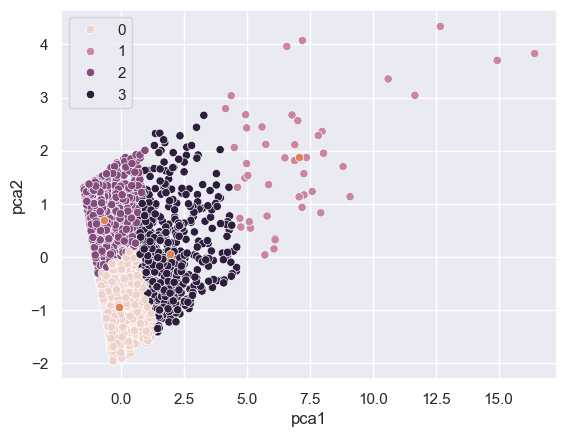

In [30]:
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue=km.labels_)
sns.scatterplot(x=centroid[:,0], y=centroid[:,1], markers='x', sizes=2)

In [31]:
df_rfm['label'] = km.labels_

df_rfm.head()

,user_id,amount,frequency,recency,label
0,001b5eddf7,591500,2,447,2
1,0023cedbf9,7000,1,489,2
2,0024ae4898,436800,2,587,2
3,002d8b5849,204750,1,137,0
4,003e99a26e,145600,1,711,2


<Axes: xlabel='label', ylabel='amount'>

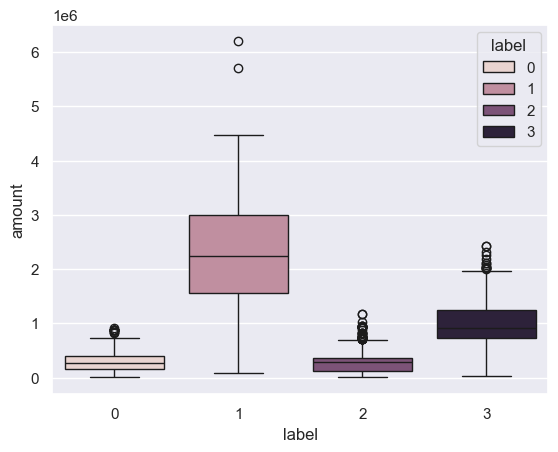

In [32]:
sns.boxplot(data=df_rfm, x='label', y='amount', hue='label')

<Axes: xlabel='label', ylabel='frequency'>

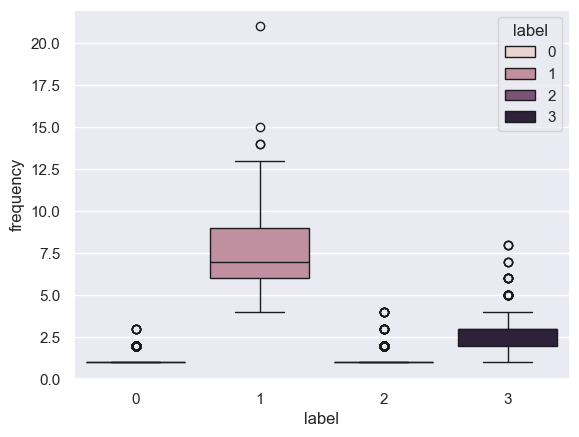

In [33]:
sns.boxplot(data=df_rfm, x='label', y='frequency', hue='label')

<Axes: xlabel='label', ylabel='recency'>

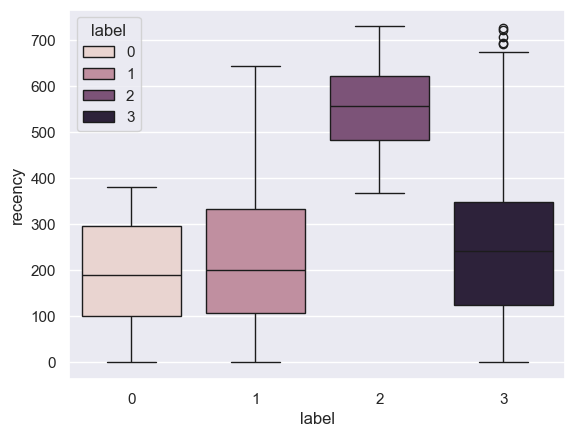

In [34]:
sns.boxplot(data=df_rfm, x='label', y='recency', hue='label')

In [35]:
df_rfm['label'].value_counts()

label
2    1864
0    1460
3     530
1      46
Name: count, dtype: int64

In [36]:
df_rfm[df_rfm['label'] == 0].describe()

,amount,frequency,recency,label
count,1460.000000,1460.000000,1460.000000,1460.0
mean,289734.071918,1.191096,195.616438,0.0
std,195902.516137,0.401918,110.497620,0.0
min,6500.000000,1.000000,0.000000,0.0
25%,150000.000000,1.000000,100.000000,0.0
50%,270000.000000,1.000000,190.000000,0.0
75%,393050.000000,1.000000,295.000000,0.0
max,910000.000000,3.000000,380.000000,0.0


In [37]:
df_rfm[df_rfm['label'] == 1].describe()

,amount,frequency,recency,label
count,4.600000e+01,46.000000,46.000000,46.0
mean,2.354387e+06,7.978261,244.652174,1.0
std,1.293835e+06,3.396005,177.446608,0.0
min,9.326000e+04,4.000000,2.000000,1.0
25%,1.552322e+06,6.000000,107.000000,1.0
50%,2.237600e+06,7.000000,200.000000,1.0
75%,3.000650e+06,9.000000,332.500000,1.0
max,6.194800e+06,21.000000,644.000000,1.0


In [38]:
df_rfm[df_rfm['label'] == 2].describe()

,amount,frequency,recency,label
count,1.864000e+03,1864.000000,1864.000000,1864.0
mean,2.780698e+05,1.190451,555.332082,2.0
std,2.005732e+05,0.437991,93.966741,0.0
min,2.400000e+03,1.000000,368.000000,2.0
25%,1.300000e+05,1.000000,483.000000,2.0
50%,2.880000e+05,1.000000,556.000000,2.0
75%,3.640000e+05,1.000000,622.000000,2.0
max,1.166400e+06,4.000000,729.000000,2.0


In [39]:
df_rfm[df_rfm['label'] == 3].describe()

,amount,frequency,recency,label
count,5.300000e+02,530.000000,530.000000,530.0
mean,9.981224e+05,2.871698,256.511321,3.0
std,4.107805e+05,1.114669,160.202769,0.0
min,2.100000e+04,1.000000,0.000000,3.0
25%,7.250000e+05,2.000000,124.250000,3.0
50%,9.180000e+05,3.000000,242.000000,3.0
75%,1.237900e+06,3.000000,348.750000,3.0
max,2.423200e+06,8.000000,726.000000,3.0


In [40]:
df_label = df_rfm[['user_id', 'label']]

df_label.head()

,user_id,label
0,001b5eddf7,2
1,0023cedbf9,2
2,0024ae4898,2
3,002d8b5849,0
4,003e99a26e,2


In [41]:
df = df.merge(df_label, how='inner', on='user_id')

df.head(100)

,Unnamed: 0,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total,label
0,0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000,2
1,1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000,2
2,2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600,2
3,3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200,2
4,4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000,2
...,...,...,...,...,...,...,...,...,...,...
95,75,2021-03-10 13:10:21,2021-03-10 13:10:21,INV-95572864-20314,18ad493172,Kids Magazine,Kids Magazine 3 Month E-Magazine Subscription,1,91000,2
96,76,2021-03-10 14:06:17,2020-12-05 16:29:50,INV-30053744-20315,9b15027be5,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200,2
97,1879,2021-09-08 13:59:23,2020-12-05 16:29:50,INV-25511903-25805,9b15027be5,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,364000,2
98,77,2021-03-10 16:49:35,2021-03-10 16:19:27,INV-69780329-20316,7fbdd02dc1,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600,3


In [42]:
df['label'].value_counts()

label
2    2219
0    1739
3    1522
1     367
Name: count, dtype: int64